In [7]:
#matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [8]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

5000
5000
5000
5000
5000
5000
5000
5000
5000


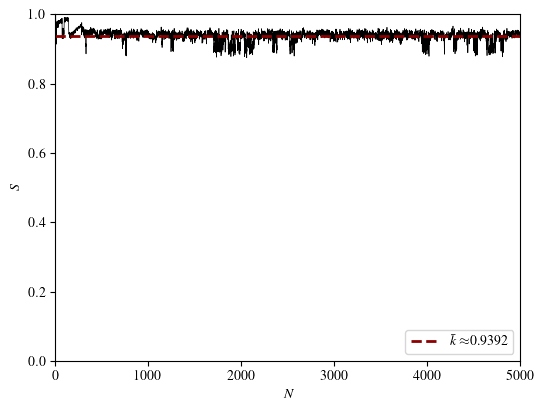

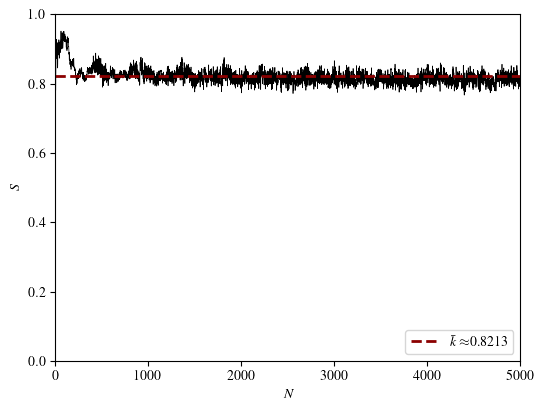

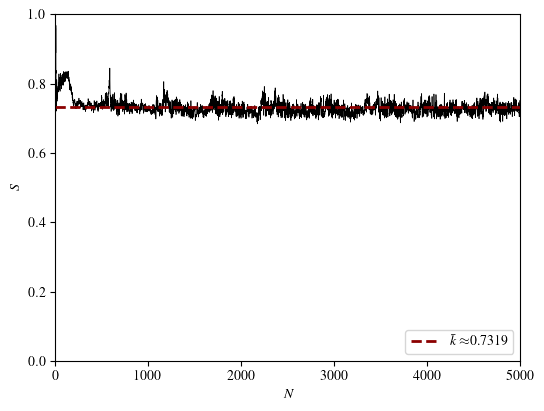

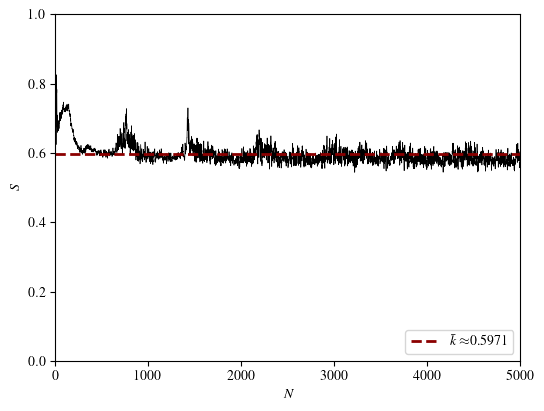

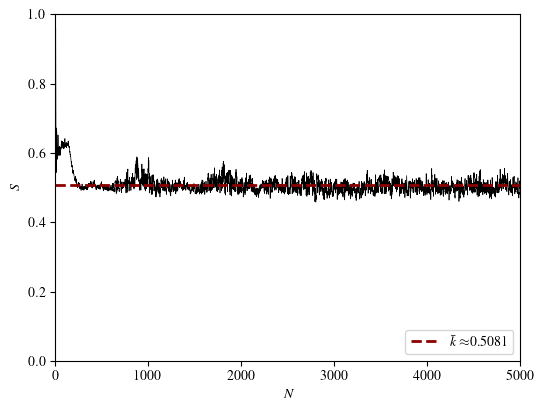

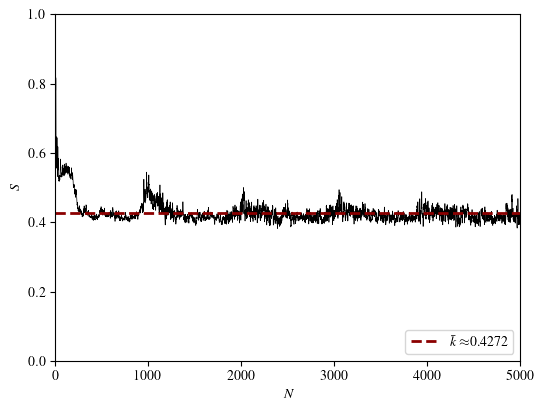

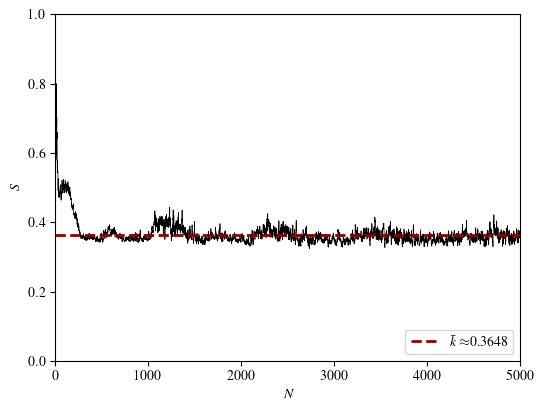

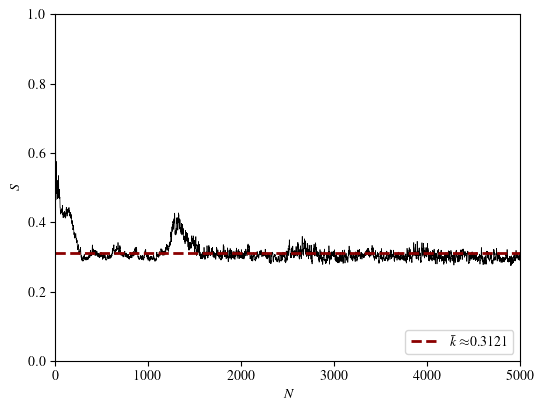

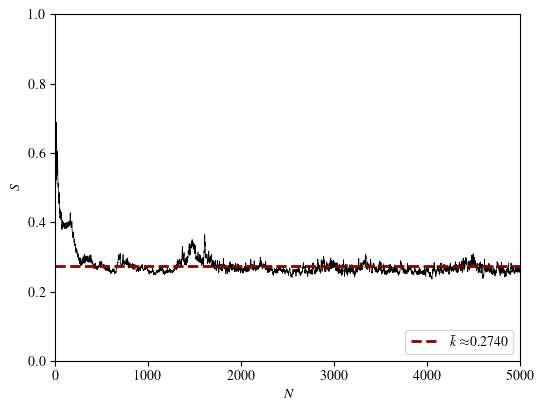

In [9]:
D = 101
interaction_pattern = "r"
# savefilepath = "C:/dev/Multicqw/biased_plots/"
max_qubit_num = 10
if D == 10 and interaction_pattern == "r":
    max_qubit_num = 12
qubit_nums = np.arange(2,max_qubit_num+1)
qubit_reals = qubit_nums.size
averages = np.zeros(qubit_reals)
variances = np.zeros(qubit_reals)
entropy_variances = np.zeros(qubit_reals)
pos = 0
for n_qubits in qubit_nums:
    filename = "qsums_dim" + str(D) + "_q" + str(n_qubits) + ".txt"
    Qsums = np.genfromtxt("C:/dev/Multicqw/data/sums/"+interaction_pattern+filename, usecols = 0, delimiter=",", dtype = float)
    T = Qsums.size
    print(T)
    normQsums = ((3/4)**n_qubits) * Qsums
    entropy = - np.log(Qsums)
    normentropy = - np.log(normQsums)
    t = np.arange(0,T)
    avg = np.average(normQsums[50:])
    averages[pos] = avg
    variances[pos] = np.var(normQsums[50:])
    entropy_variances[pos] = np.var(normentropy)
    pos += 1
    # print(pos)


    fig = plt.figure(figsize=(6,4.5))
    fig.clear()
    ax = fig.subplots()
    # plt.title(str(n_qubits))
    # ax.set_title(r'norm $\sum Q^2 = - \ln \left[ \left( \frac{3}{4} \right)^{n_q} \cdot \sum Q^2 \right]$')
    ax.plot(t,normQsums,'k-', lw=0.5)
    ax.set_xlim(0,T)
    ax.set_xlabel(r'$N$')
    ax.set_ylim(0,max(normQsums))
    # ax.set_ylim(0,7)
    ax.set_ylabel(r'$S$')
    ax.plot((0,T),(avg,avg),'--', label = r'$\bar{k} \approx $' + str(avg)[:6],lw=2,color="darkred")
    ax.legend(loc='lower right')
    # fig.savefig(savefilepath + "dim" + str(D) + "/" + str(n_qubits)+"q.png")
    # ax.spines[['right','top']].set_visible(False)

In [10]:
entropy = -np.log(averages)
res = stats.linregress(qubit_nums,entropy)

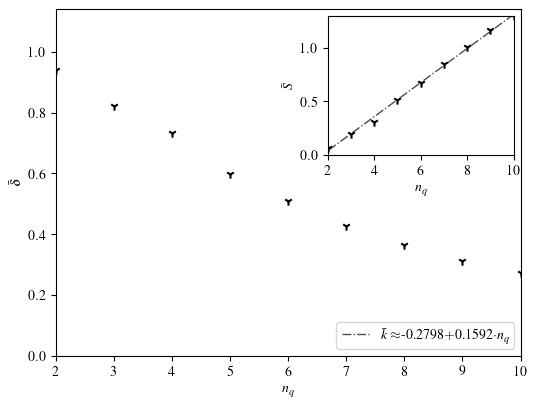

In [11]:
fig = plt.figure(figsize=(6,4.5))
fig.clear()
ax = fig.subplots()
# plt.title("avg(k)")
ax.set_xlim(2,10)
ax.set_xlabel(r'$n_q$')
ax.set_ylim(0,max(averages)+0.2)
# ax.set_ylim(0,12)
ax.scatter(qubit_nums,averages,marker='1',c='k')
ax.set_ylabel(r'$\bar{\delta}$')
ax.plot([10000,10000],[10000,10000],'-.k',linewidth=1,alpha=0.7,label=r'$\bar{k} \approx $' + str(res.intercept)[:7] + r'$+$' + str(res.slope)[:6] + r'$\cdot n_q$')

inax = inset_axes(ax,width="40%",height="40%",loc="upper right")
inax.scatter(qubit_nums,entropy,marker='1',c='k')
inax.set_xlim(2,max(qubit_nums))
inax.set_xlabel(r'$n_q$')
inax.set_ylim(0,max(entropy))
inax.set_ylabel(r'$\bar{S}$')

inax.plot([0,max(qubit_nums)],[res.intercept,res.intercept+max(qubit_nums)*res.slope],'-.k',linewidth=1,alpha=0.7,label=r'$\bar{k} \approx $' + str(res.intercept)[:7] + r'$+$' + str(res.slope)[:6] + r'$\cdot n_q$')
ax.legend(loc='lower right')
# ax.spines[['right', 'top']].set_visible(False)
# plt.savefig(savefilepath + "dim" + str(D) + "/"+"averages.png")

Text(0, 0.5, '$\\sigma(\\delta)$')

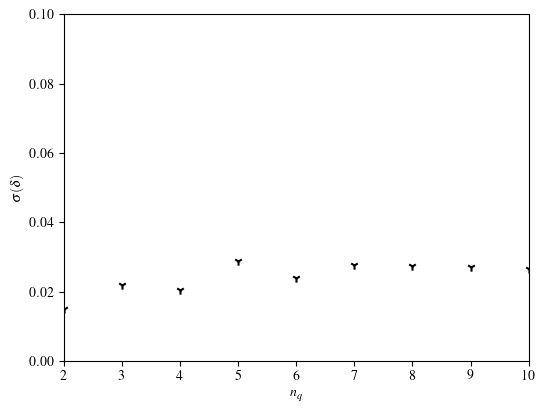

In [20]:
fig = plt.figure(figsize=(6,4.5))
fig.clear()
ax = fig.subplots()
# plt.title("avg(k)")
ax.scatter(qubit_nums,np.sqrt(variances),marker='1',c='k')
ax.set_xlim(2,max(qubit_nums))
ax.set_xlabel(r'$n_q$')
ax.set_ylim(0,0.1)
ax.set_ylabel(r'$\sigma(\delta)$')
# plt.savefig(savefilepath + "dim" + str(D) + "/"+"averages.png")

Text(0, 0.5, '$\\sigma(S)/\\bar{S}$')

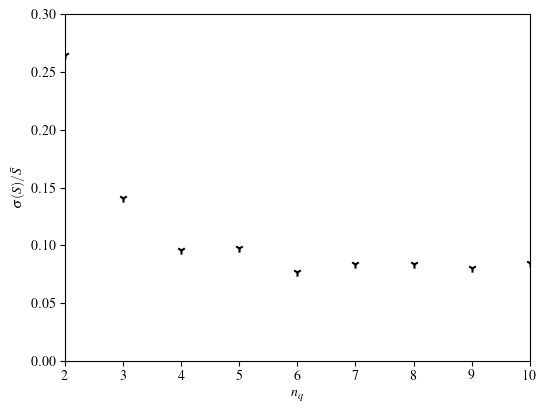

In [16]:
fig = plt.figure(figsize=(6,4.5))
fig.clear()
ax = fig.subplots()
# plt.title("avg(k)")
ax.scatter(qubit_nums,np.sqrt(entropy_variances)/entropy,marker='1',c='k')
ax.set_xlim(2,max(qubit_nums))
ax.set_xlabel(r'$n_q$')
ax.set_ylim(0,0.3)
ax.set_ylabel(r'$\sigma(S)/\bar{S}$')
# plt.savefig(savefilepath + "dim" + str(D) + "/"+"averages.png")